## Data description

In [1]:
## Imports
from datasets import load_from_disk, Dataset
import numpy as np
import pandas as pd
import pyarrow as pa
from pylab import *
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
data_dir = "/work3/s174498/concept_random_dataset/"

### 1: "Base case: Twitter data"

In [3]:
## Load "Tweet"-dataset

# emoji
ds_emoji_train = pd.DataFrame(load_from_disk(data_dir + 'tweet_emoji/train'))
ds_emoji_test = pd.DataFrame(load_from_disk(data_dir + 'tweet_emoji/test'))

# stance datasets
ds_climate_train = load_from_disk(data_dir + 'tweet_stance_climate/train')
ds_abortion_train = load_from_disk(data_dir + 'tweet_stance_abortion/train')
ds_feminist_train = load_from_disk(data_dir + 'tweet_stance_feminist/train')
ds_hillary_train = load_from_disk(data_dir + 'tweet_stance_hillary/train')
ds_atheism_train = load_from_disk(data_dir + 'tweet_stance_atheism/train')

# emotion
ds_emotion_train = load_from_disk(data_dir + 'tweet_emotion/train')
ds_emotion_test = load_from_disk(data_dir + 'tweet_emotion/test')

# hate
ds_hate_train = load_from_disk(data_dir + 'tweet_hate/train')
ds_hate_test = load_from_disk(data_dir + 'tweet_hate/test')

# irony
ds_irony_train = load_from_disk(data_dir + 'tweet_irony/train')
ds_irony_test = load_from_disk(data_dir + 'tweet_irony/test')

# offensive
ds_offensive_train = load_from_disk(data_dir + 'tweet_offensive/train')
ds_offensive_test = load_from_disk(data_dir + 'tweet_offensive/test')

Sentences from the emoji-datasets (train and test) are "merged" into longer sentences. 

In [4]:
unique_train = ds_emoji_train['label'].unique()
unique_train.sort()
unique_train

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [5]:
unique_test = ds_emoji_test['label'].unique()
unique_test.sort()
unique_test

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [6]:
new_sentences = []
remaining_sentences = []

for i in range(len(unique_train)):

    # making boolean series for a team name
    filter_train = ds_emoji_train["label"]==unique_train[i]
    filter_test = ds_emoji_test["label"]==unique_test[i]

    # filtering data
    df_filter_train = ds_emoji_train.where(filter_train)
    df_filter_test = ds_emoji_test.where(filter_test)

    df_new1 = df_filter_train[~df_filter_train.isnull().any(axis=1)]
    df_new2 = df_filter_test[~df_filter_test.isnull().any(axis=1)]

    print(len(df_new1))
    print(len(df_new2))

    length_min = min(len(df_new1), len(df_new2))
    length_max = max(len(df_new1), len(df_new2))

    for j in range(0, length_min):
        new_sentences.append(df_new1.iloc[j]['text']+df_new2.iloc[j]['text'])
    print('length of new_sentences', len(new_sentences))

    # save the remaining sentences
    if(length_max == len(df_new1)):
        df_remain = df_new1
    else:
        df_remain = df_new2

    for h in range(length_min+1, length_max):
        remaining_sentences.append(df_remain.iloc[h]['text'])
    print('length of remaining_sentences', len(remaining_sentences))

9204
10798
length of new_sentences 9204
length of remaining_sentences 1593
4901
4830
length of new_sentences 14034
length of remaining_sentences 1663
4713
4534
length of new_sentences 18568
length of remaining_sentences 1841
2043
2605
length of new_sentences 20611
length of remaining_sentences 2402
2146
3716
length of new_sentences 22757
length of remaining_sentences 3971
2132
1613
length of new_sentences 24370
length of remaining_sentences 4489
2078
1996
length of new_sentences 26366
length of remaining_sentences 4570
2345
2749
length of new_sentences 28711
length of remaining_sentences 4973
1287
1549
length of new_sentences 29998
length of remaining_sentences 5234
1391
1175
length of new_sentences 31173
length of remaining_sentences 5449
1982
1432
length of new_sentences 32605
length of remaining_sentences 5998
946
1949
length of new_sentences 33551
length of remaining_sentences 7000
1246
1265
length of new_sentences 34797
length of remaining_sentences 7018
980
1114
length of new_sen

Concatenate all lists

In [7]:
emoji_sentences = new_sentences + remaining_sentences

In [8]:
stance_sentences = ds_climate_train['text'] + ds_abortion_train['text'] + ds_feminist_train['text'] + ds_hillary_train['text'] + ds_atheism_train['text']

In [9]:
emotion_sentences = ds_emotion_train['text'] + ds_emotion_test['text']

Filter 'non-hate', 'non-irony' and 'non-offensive' from both train and test datasets

In [10]:
df_label_hate = pd.DataFrame(ds_hate_train['label'])
idx_nonhate = df_label_hate[df_label_hate[0] == 0].index.values

df_label_irony = pd.DataFrame(ds_irony_train['label'])
idx_nonirony = df_label_irony[df_label_irony[0] == 0].index.values

df_label_offensive = pd.DataFrame(ds_offensive_train['label'])
idx_nonoffensive = df_label_offensive[df_label_offensive[0] == 0].index.values

nonconcepts_train = ds_hate_train[idx_nonhate]['text']+ ds_irony_train[idx_nonirony]['text'] + ds_offensive_train[idx_nonoffensive]['text']

In [11]:
df_label_hate = pd.DataFrame(ds_hate_test['label'])
idx_nonhate = df_label_hate[df_label_hate[0] == 0].index.values

df_label_irony = pd.DataFrame(ds_irony_test['label'])
idx_nonirony = df_label_irony[df_label_irony[0] == 0].index.values

df_label_offensive = pd.DataFrame(ds_offensive_test['label'])
idx_nonoffensive = df_label_offensive[df_label_offensive[0] == 0].index.values

nonconcepts_test = ds_hate_test[idx_nonhate]['text']+ ds_irony_test[idx_nonirony]['text'] + ds_offensive_test[idx_nonoffensive]['text']

Again, concat lists

In [12]:
nonconcepts_sentences = nonconcepts_train + nonconcepts_test

In [13]:
concat_sentences = emoji_sentences + stance_sentences + emotion_sentences + nonconcepts_sentences

Count the number of words in sentences

In [14]:
df_random = pd.DataFrame({'Sentences': concat_sentences})

word_in_sentence = []
for i in range(len(df_random['Sentences'])):
    word_in_sentence.append(len(df_random['Sentences'][i].split()))

df_random['words in sentences'] = word_in_sentence

Making sure that all sentences are not too long

In [15]:
df_random = df_random[df_random['words in sentences'] < 45]

In [16]:
# df_random_data = pd.DataFrame({'title': 'random', 'text_list': list(df_random['Sentences'])})
# data_random = Dataset(pa.Table.from_pandas(df_random_data))

# save data
# data_random.save_to_disk('/work3/s174498/concept_random_dataset/tweet_random')

Filter only 'hate', 'irony' and offensive' sentences to create our concept data. Afterwards, count words in sentences

In [17]:
df_label_hate = pd.DataFrame(ds_hate_test['label'])
idx_hate = df_label_hate[df_label_hate[0] == 1].index.values
df_hate = pd.DataFrame({'Sentences': ds_hate_test[idx_hate]['text']})

word_in_sentence = []
for i in range(len(df_hate['Sentences'])):
    word_in_sentence.append(len(df_hate['Sentences'][i].split()))

df_hate['words in sentences'] = word_in_sentence

In [18]:
df_label_irony= pd.DataFrame(ds_irony_test['label'])
idx_irony = df_label_irony[df_label_irony[0] == 1].index.values
df_irony = pd.DataFrame({'Sentences': ds_irony_test[idx_irony]['text']})

word_in_sentence = []
for i in range(len(df_irony['Sentences'])):
    word_in_sentence.append(len(df_irony['Sentences'][i].split()))

df_irony['words in sentences'] = word_in_sentence

In [19]:
df_label_offensive = pd.DataFrame(ds_offensive_test['label'])
idx_offensive = df_label_offensive[df_label_offensive[0] == 1].index.values
df_offensive = pd.DataFrame({'Sentences': ds_offensive_test[idx_offensive]['text']})

word_in_sentence = []
for i in range(len(df_offensive['Sentences'])):
    word_in_sentence.append(len(df_offensive['Sentences'][i].split()))

df_offensive['words in sentences'] = word_in_sentence

In [20]:
import warnings
import pylab
warnings.filterwarnings("ignore")

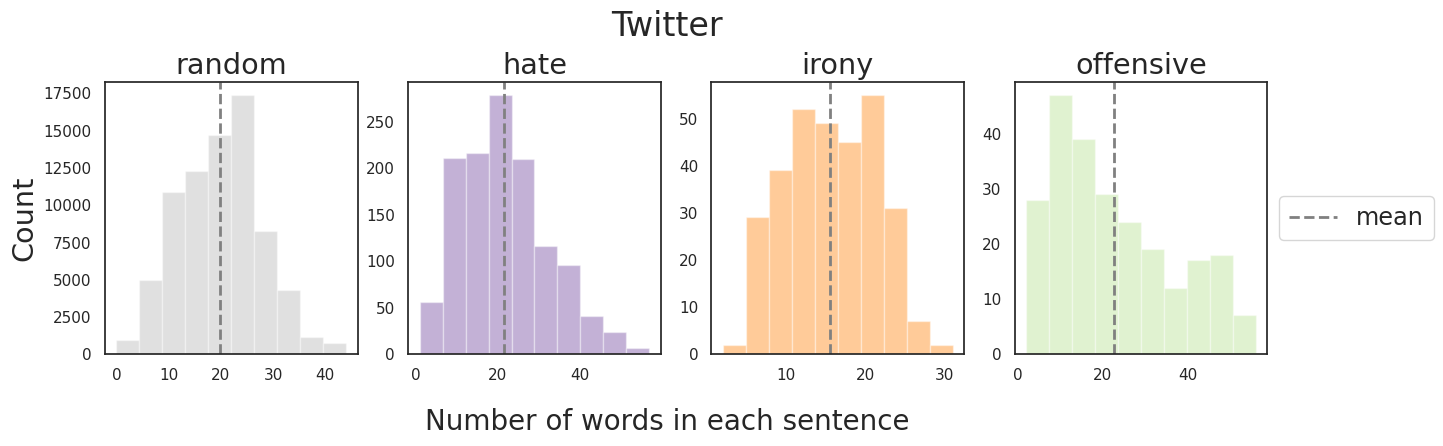

In [21]:
sns.set(rc={"figure.figsize": (15, 4)})
sns.set_style("white")
plt.legend(labels=['random', 'hate', 'irony', 'offensive'])

subplot(1,4,1)
ax = sns.distplot(df_random['words in sentences'], bins = 10, kde=False, label=None, color = sns.color_palette("Set2")[-1])
ax.axvline(x=df_random['words in sentences'].mean(),
            color='grey',
            ls='--', 
            lw=2)
ax.set_title('random', fontsize='xx-large')
ax.set_ylabel('Count', fontsize='xx-large')
ax.set(xlabel=' ')

subplot(1,4,2)
ax = sns.distplot(df_hate['words in sentences'], bins = 10, kde=False, label=None, color = sns.color_palette("Paired")[9])
ax.axvline(x=df_hate['words in sentences'].mean(),
            color='grey',
            ls='--', 
            lw=2)
ax.set_title('hate', fontsize='xx-large')
ax.set(xlabel=' ')

subplot(1,4,3)
ax = sns.distplot(df_irony['words in sentences'], bins = 10, kde=False, color = sns.color_palette("Paired")[7])
ax.axvline(x=df_irony['words in sentences'].mean(),
            color='grey',
            ls='--', 
            lw=2)
ax.set_title('irony', fontsize='xx-large')
ax.set(xlabel=' ')

subplot(1,4,4)
ax = sns.distplot(df_offensive['words in sentences'], bins = 10, kde=False, color = sns.color_palette("Paired")[2])
ax.axvline(x=df_offensive['words in sentences'].mean(),
            color='grey',
            ls='--', 
            lw=2)
ax.set_title('offensive', fontsize='xx-large')
ax.legend(labels=['mean'], loc='center left', bbox_to_anchor=(1, 0.5), fontsize='x-large')
ax.set(xlabel=' ')

fig=ax.figure
#fig.suptitle('Twitter', fontsize = 24)
#fig.tight_layout()
fig.subplots_adjust(top=0.85)
fig.subplots_adjust(bottom=0.17)
fig.text(0.5, 0.99, 'Twitter',  ha="center", va="center", fontsize=24)
fig.text(0.5,0.000000001, "Number of words in each sentence", ha="center", va="center", fontsize=20)
pylab.savefig("tweet_sentences.pdf", bbox_inches='tight')
plt.show()

In [22]:
from transformers import RobertaTokenizer
tokenizer_pretrained = RobertaTokenizer.from_pretrained('roberta-base')

Compute number of tokens per sentence in the datasets

In [23]:
tokens_random = []
for i in list(df_random['Sentences'].index):
    numb_tokens = len(tokenizer_pretrained.encode(df_random['Sentences'][i]))
    tokens_random.append(numb_tokens)

tokens_hate = []
for i in list(df_hate['Sentences'].index):
    numb_tokens = len(tokenizer_pretrained.encode(df_hate['Sentences'][i]))
    tokens_hate.append(numb_tokens)

tokens_irony = []
for i in list(df_irony['Sentences'].index):
    numb_tokens = len(tokenizer_pretrained.encode(df_irony['Sentences'][i]))
    tokens_irony.append(numb_tokens)

tokens_offensive = []
for i in list(df_offensive['Sentences'].index):
    numb_tokens = len(tokenizer_pretrained.encode(df_offensive['Sentences'][i]))
    tokens_offensive.append(numb_tokens)

Create table of stats

In [26]:
list_dataset = ['random', 'hate', 'irony', 'offensive']
list_mean_words = [round(np.mean(df_random['words in sentences']),1), round(np.mean(df_hate['words in sentences']),1), round(np.mean(df_irony['words in sentences']),1), round(np.mean(df_offensive['words in sentences']),1)]
list_mean_tokens = [round(np.mean(tokens_random),1), round(np.mean(tokens_hate),1), round(np.mean(tokens_irony),1), round(np.mean(tokens_offensive),1)]
list_min_tokens = [round(np.min(tokens_random),1), round(np.min(tokens_hate),1), round(np.min(tokens_irony),1), round(np.min(tokens_offensive),1)]
list_max_tokens = [round(np.max(tokens_random),1), round(np.max(tokens_hate),1), round(np.max(tokens_irony),1), round(np.max(tokens_offensive),1)]
list_sentences = [len(df_random), len(df_hate), len(df_irony), len(df_offensive)]

In [30]:
tweet_stats = pd.DataFrame({'Twitter data': list_dataset, 
                            'Avg. number of words per sentence': list_mean_words,
                            'Avg. number of tokens per sentence': list_mean_tokens,
                            'Min. numb. of tokens per sentence': list_min_tokens,
                            'Max. numb. of tokens per sentence': list_max_tokens,
                            'Number of sentences': list_sentences})
tweet_stats

,Twitter data,Avg. number of words per sentence,Avg. number of tokens per sentence,Min. numb. of tokens per sentence,Max. numb. of tokens per sentence,Number of sentences
0,random,19.8,35.8,2,206,75549
1,hate,21.7,37.2,5,110,1252
2,irony,15.5,25.6,7,47,311
3,offensive,22.6,38.2,5,93,240


In [31]:
print(tweet_stats.to_latex(index=False))

\begin{tabular}{lrrrrr}
\toprule
Twitter data &  Avg. number of words per sentence &  Avg. number of tokens per sentence &  Min. numb. of tokens per sentence &  Max. numb. of tokens per sentence &  Number of sentences \\
\midrule
      random &                               19.8 &                                35.8 &                                  2 &                                206 &                75549 \\
        hate &                               21.7 &                                37.2 &                                  5 &                                110 &                 1252 \\
       irony &                               15.5 &                                25.6 &                                  7 &                                 47 &                  311 \\
   offensive &                               22.6 &                                38.2 &                                  5 &                                 93 &                  240 \\
\bottomrule
\end{t

### 2: "Split concept into sub-concepts"

In [32]:
## Load "wikipedia_split"-data as random data
ds_random = load_from_disk(data_dir + 'wikipedia_split')

In [33]:
## Load "Gender"-data form wikipedia

# gender sub-concepts
ds_woman = load_from_disk(data_dir + 'wikipedia_20220301/gender_concepts/woman_female')
ds_man = load_from_disk(data_dir + 'wikipedia_20220301/gender_concepts/man_male')
ds_intersex = load_from_disk(data_dir + 'wikipedia_20220301/gender_concepts/intersex')

# Create main concept
#ds_gender = ds_woman['text_list'] + ds_man['text_list'] + ds_intersex['text_list']
ds_gender = load_from_disk(data_dir + 'wikipedia_20220301/gender_concepts')

In [34]:
df_random = pd.DataFrame({'Sentences':ds_random['complex_sentence']})

word_in_sentence = []
for i in range(len(df_random['Sentences'])):
    word_in_sentence.append(len(df_random['Sentences'][i].split()))

df_random['words in sentences'] = word_in_sentence

In [35]:
df_gender = pd.DataFrame({'Sentences':ds_gender['text_list']})

word_in_sentence = []
for i in range(len(df_gender)):
    word_in_sentence.append(len(df_gender['Sentences'][i].split()))

df_gender['words in sentences'] = word_in_sentence

In [36]:
## woman
df_woman = pd.DataFrame({'Sentences':ds_woman['text_list']})

word_in_sentence = []
for i in range(len(df_woman)):
    word_in_sentence.append(len(df_woman['Sentences'][i].split()))

df_woman['words in sentences'] = word_in_sentence

## man
df_man = pd.DataFrame({'Sentences':ds_man['text_list']})

word_in_sentence = []
for i in range(len(df_man)):
    word_in_sentence.append(len(df_man['Sentences'][i].split()))

df_man['words in sentences'] = word_in_sentence

## intersex
df_intersex = pd.DataFrame({'Sentences':ds_intersex['text_list']})

word_in_sentence = []
for i in range(len(df_intersex)):
    word_in_sentence.append(len(df_intersex['Sentences'][i].split()))

df_intersex['words in sentences'] = word_in_sentence

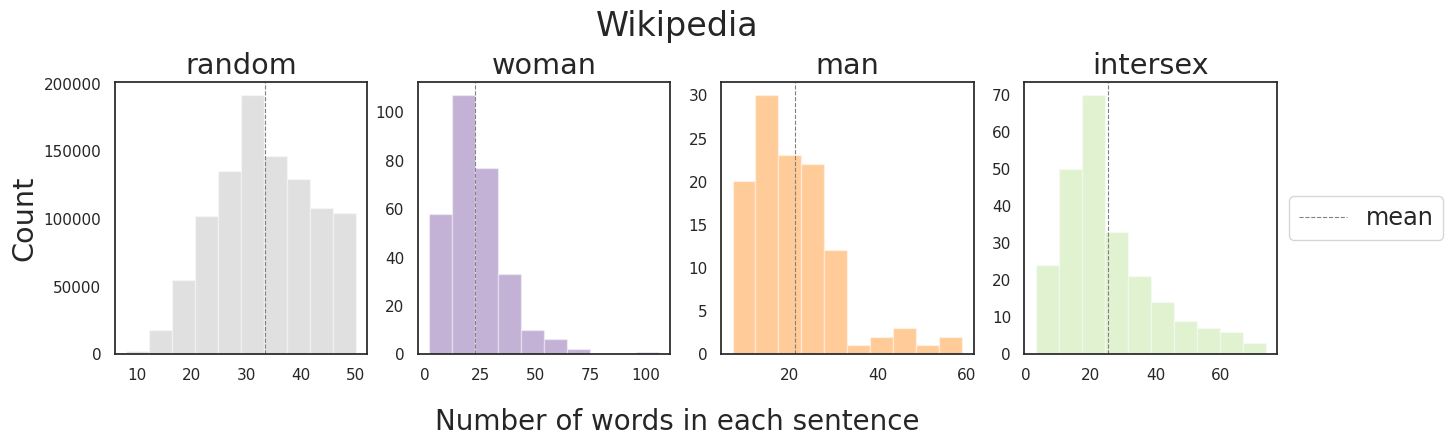

In [65]:
sns.set(rc={"figure.figsize": (15, 4)})
sns.set_style("white")
#plt.legend(labels=['random', 'woman', 'man', 'intersex'])

subplot(1,4,1)
ax = sns.distplot(df_random['words in sentences'], bins = 10, kde=False, label=None, color = sns.color_palette("Set2")[-1])
ax.axvline(x=df_random['words in sentences'].mean(),
            color='grey',
            ls='--', 
            lw=0.8)
ax.set_title('random', fontsize='xx-large')
ax.set_ylabel('Count', fontsize='xx-large')
ax.set(xlabel=' ')

subplot(1,4,2)
ax = sns.distplot(df_woman['words in sentences'], bins = 10, kde=False, label=None, color = sns.color_palette("Paired")[9])
ax.axvline(x=df_woman['words in sentences'].mean(),
            color='grey',
            ls='--', 
            lw=0.8)
ax.set_title('woman', fontsize='xx-large')
ax.set(xlabel=' ')

subplot(1,4,3)
ax = sns.distplot(df_man['words in sentences'], bins = 10, kde=False, color = sns.color_palette("Paired")[7])
ax.axvline(x=df_man['words in sentences'].mean(),
            color='grey',
            ls='--', 
            lw=0.8)
ax.set_title('man', fontsize='xx-large')
ax.set(xlabel=' ')

subplot(1,4,4)
ax = sns.distplot(df_intersex['words in sentences'], bins = 10, kde=False, color = sns.color_palette("Paired")[2])
ax.axvline(x=df_intersex['words in sentences'].mean(),
            color='grey',
            ls='--', 
            lw=0.8)
ax.set_title('intersex', fontsize='xx-large')
ax.legend(labels=['mean'], loc='center left', bbox_to_anchor=(1, 0.5), fontsize='x-large')
ax.set(xlabel=' ')

fig=ax.figure
fig.subplots_adjust(top=0.85)
fig.subplots_adjust(bottom=0.17)
fig.text(0.5, 0.99, 'Wikipedia',  ha="center", va="center", fontsize=24)
fig.text(0.5,0.000000001, "Number of words in each sentence", ha="center", va="center", fontsize=20)
pylab.savefig("wiki_sentences.pdf", bbox_inches='tight')

In [38]:
tokens_random = []
for i in list(df_random['Sentences'].index):
    numb_tokens = len(tokenizer_pretrained.encode(df_random['Sentences'][i]))
    tokens_random.append(numb_tokens)

tokens_woman = []
for i in list(df_woman['Sentences'].index):
    numb_tokens = len(tokenizer_pretrained.encode(df_woman['Sentences'][i]))
    tokens_woman.append(numb_tokens)

tokens_man = []
for i in list(df_man['Sentences'].index):
    numb_tokens = len(tokenizer_pretrained.encode(df_man['Sentences'][i]))
    tokens_man.append(numb_tokens)

tokens_intersex = []
for i in list(df_intersex['Sentences'].index):
    numb_tokens = len(tokenizer_pretrained.encode(df_intersex['Sentences'][i]))
    tokens_intersex.append(numb_tokens)

In [41]:
list_dataset = ['random', 'woman', 'man', 'intersex']
list_mean_words = [round(np.mean(df_random['words in sentences']),1), round(np.mean(df_woman['words in sentences']),1), round(np.mean(df_man['words in sentences']),1), round(np.mean(df_intersex['words in sentences']),1)]
list_mean_tokens = [round(np.mean(tokens_random),1), round(np.mean(tokens_woman),1), round(np.mean(tokens_man),1), round(np.mean(tokens_intersex),1)]
list_min_tokens = [round(np.min(tokens_random),1), round(np.min(tokens_woman),1), round(np.min(tokens_man),1), round(np.min(tokens_intersex),1)]
list_max_tokens = [round(np.max(tokens_random),1), round(np.max(tokens_woman),1), round(np.max(tokens_man),1), round(np.max(tokens_intersex),1)]
list_sentences = [len(df_random), len(df_woman), len(df_man), len(df_intersex)]

In [43]:
wiki_stats = pd.DataFrame({'Twitter data': list_dataset, 
                            'Avg. number of words per sentence': list_mean_words,
                            'Avg. number of tokens per sentence': list_mean_tokens,
                            'Min. number of tokens per sentence': list_min_tokens,
                            'max. number of tokens per sentence': list_max_tokens,
                            'Number of sentences': list_sentences})
wiki_stats

,Twitter data,Avg. number of words per sentence,Avg. number of tokens per sentence,Min. number of tokens per sentence,max. number of tokens per sentence,Number of sentences
0,random,33.4,40.0,10,283,989944
1,woman,22.9,30.6,6,120,294
2,man,21.1,29.7,9,100,116
3,intersex,25.2,35.6,6,107,237


In [44]:
print(wiki_stats.to_latex(index=False)) 

\begin{tabular}{lrrrrr}
\toprule
Twitter data &  Avg. number of words per sentence &  Avg. number of tokens per sentence &  Min. number of tokens per sentence &  max. number of tokens per sentence &  Number of sentences \\
\midrule
      random &                               33.4 &                                40.0 &                                  10 &                                 283 &               989944 \\
       woman &                               22.9 &                                30.6 &                                   6 &                                 120 &                  294 \\
         man &                               21.1 &                                29.7 &                                   9 &                                 100 &                  116 \\
    intersex &                               25.2 &                                35.6 &                                   6 &                                 107 &                  237 \\
\bottomr

### 3: "KG used to generate concepts"

In [45]:
## Load "wikipedia_split"-data as random data
ds_random = load_from_disk(data_dir + 'wikipedia_split')

In [46]:
from datasets import load_from_disk

In [47]:
df_random = pd.DataFrame({'Sentences':ds_random['complex_sentence']})

word_in_sentence = []
for i in range(len(df_random['Sentences'])):
    word_in_sentence.append(len(df_random['Sentences'][i].split()))

df_random['words in sentences'] = word_in_sentence

In [48]:
tokens_random = []
for i in list(df_random['Sentences'].index):
    numb_tokens = len(tokenizer_pretrained.encode(df_random['Sentences'][i]))
    tokens_random.append(numb_tokens)

In [49]:
# Initialize lists
list_subconcept = ['Random']
list_quantile05_words = [round(np.quantile(df_random['words in sentences'],0.5),1)]
list_quantile025_words = [round(np.quantile(df_random['words in sentences'],0.25),1)]
list_quantile075_words = [round(np.quantile(df_random['words in sentences'],0.75),1)]
list_mean_words = [round(np.mean(df_random['words in sentences']),1)]
list_mean_tokens = [round(np.mean(tokens_random),1)]
list_sentences = [len(df_random)]

In [50]:
import os
path_of_concepts = '/work3/s174498/concept_random_dataset/wikipedia_20220301/sports_concepts/'

list_of_folders = [os.path.join(path_of_concepts, o) for o in os.listdir(path_of_concepts) 
                        if os.path.isdir(os.path.join(path_of_concepts,o))]

In [51]:
for i in range(len(list_of_folders)):
    ds_subconcepts = load_from_disk(list_of_folders[i])
    
    # Extract name
    subconcept_name = os.path.split(list_of_folders[i])

    # Count numbers of words in sentence
    df_subconcepts = pd.DataFrame({'Sentences':ds_subconcepts['text_list']})
    word_in_sentence = []
    for j in range(len(df_subconcepts)):
        word_in_sentence.append(len(df_subconcepts['Sentences'][j].split()))
    df_subconcepts['words in sentences'] = word_in_sentence

    # Count number of tokens in sentence
    tokens_subconcept = []
    for j in list(df_subconcepts['Sentences'].index):
        numb_tokens = len(tokenizer_pretrained.encode(df_subconcepts['Sentences'][j]))
        tokens_subconcept.append(numb_tokens)
    
    # Save into lists
    list_subconcept.append(subconcept_name[1])
    list_quantile05_words.append(round(np.quantile(df_subconcepts['words in sentences'],0.5),1))
    list_quantile025_words.append(round(np.quantile(df_subconcepts['words in sentences'],0.25),1))
    list_quantile075_words.append(round(np.quantile(df_subconcepts['words in sentences'],0.75),1))
    list_mean_words.append(round(np.mean(df_subconcepts['words in sentences']),1))
    list_mean_tokens.append(round(np.mean(tokens_subconcept),1))
    list_sentences.append(len(df_subconcepts))


Token indices sequence length is longer than the specified maximum sequence length for this model (1132 > 512). Running this sequence through the model will result in indexing errors


In [52]:
wiki_stats = pd.DataFrame({'Subconcepts': list_subconcept, 
                            'Avg. number of words per sentence': list_mean_words,
                            'Median of words per sentence': list_quantile05_words,
                            'Q1 of words per sentence': list_quantile025_words,
                            'Q3 of words per sentence': list_quantile075_words,
                            'Avg. numb. of tokens per sentence': list_mean_tokens,
                            'Number of sentences': list_sentences})
wiki_stats

,Subconcepts,Avg. number of words per sentence,Median of words per sentence,Q1 of words per sentence,Q3 of words per sentence,Avg. numb. of tokens per sentence,Number of sentences
0,Random,33.4,33.0,27.0,40.0,40.0,989944
1,Combat sports,24.0,20.5,14.2,28.0,38.0,302
2,Equestrian sports,22.4,19.0,13.0,28.0,30.5,3430
3,Orienteering family,21.2,19.0,13.0,27.0,28.7,698
4,Motersport,21.5,19.0,14.0,26.0,29.3,822
5,Hunting,22.9,21.0,14.0,29.0,31.1,449
6,Other mind sports,24.7,22.0,15.0,30.0,31.7,233
7,Dog sports,21.4,19.0,13.0,27.0,29.1,1808
8,Parkour Freerunning,22.4,21.0,14.0,27.0,30.5,560
9,Acrobatic sports,21.6,19.0,14.0,27.0,29.1,2336


In [53]:
wiki_stats = wiki_stats.sort_values(by=['Subconcepts'])

wiki_stats["new"] = range(1,len(wiki_stats)+1)

wiki_stats.loc[wiki_stats.index==0, 'new'] = 0
wiki_stats = wiki_stats.sort_values("new").drop('new', axis=1)

In [54]:
print(wiki_stats.to_latex(index=False)) 

\begin{tabular}{lrrrrrr}
\toprule
              Subconcepts &  Avg. number of words per sentence &  Median of words per sentence &  Q1 of words per sentence &  Q3 of words per sentence &  Avg. numb. of tokens per sentence &  Number of sentences \\
\midrule
                   Random &                               33.4 &                          33.0 &                      27.0 &                      40.0 &                               40.0 &               989944 \\
         Acrobatic sports &                               21.6 &                          19.0 &                      14.0 &                      27.0 &                               29.1 &                 2336 \\
               Air sports &                               21.0 &                          19.0 &                      13.0 &                      26.0 &                               27.5 &                  276 \\
Aquatic and paddle sports &                               23.6 &                          20.0 &     

In [55]:
# Load Level I sports data
ds_sports = load_from_disk('/work3/s174498/concept_random_dataset/wikipedia_20220301/sports_concepts/')

In [56]:
# Find number of words per sentence
df_sports = pd.DataFrame({'Sentences':ds_sports['text_list']})

word_in_sentence = []
for i in range(len(df_sports['Sentences'])):
    word_in_sentence.append(len(df_sports['Sentences'][i].split()))

df_sports['words in sentences'] = word_in_sentence

In [57]:
df_sports = df_sports[df_sports['words in sentences'] < 50]

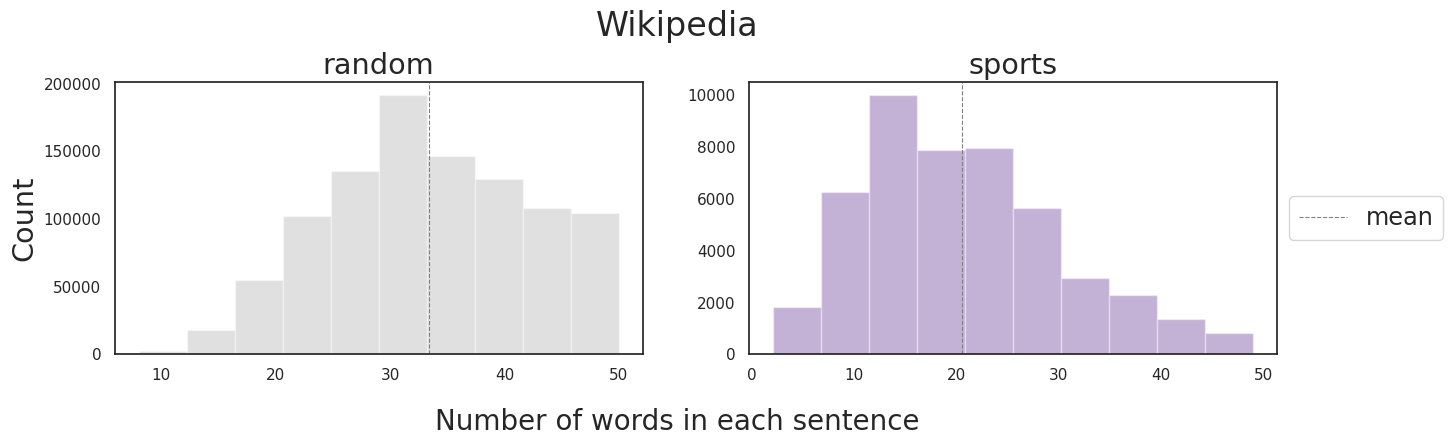

In [59]:
sns.set(rc={"figure.figsize": (15, 4)})
sns.set_style("white")
#plt.legend(labels=['random', 'woman', 'man', 'intersex'])

subplot(1,2,1)
ax = sns.distplot(df_random['words in sentences'], bins = 10, kde=False, label=None, color = sns.color_palette("Set2")[-1])
ax.axvline(x=df_random['words in sentences'].mean(),
            color='grey',
            ls='--', 
            lw=0.8)
ax.set_title('random', fontsize='xx-large')
ax.set_ylabel('Count', fontsize='xx-large')
ax.set(xlabel=' ')

subplot(1,2,2)
ax = sns.distplot(df_sports['words in sentences'], bins = 10, kde=False, label=None, color = sns.color_palette("Paired")[9])
ax.axvline(x=df_sports['words in sentences'].mean(),
            color='grey',
            ls='--', 
            lw=0.8)
ax.set_title('sports', fontsize='xx-large')
ax.legend(labels=['mean'], loc='center left', bbox_to_anchor=(1, 0.5), fontsize='x-large')
ax.set(xlabel=' ')

fig=ax.figure
fig.subplots_adjust(top=0.85)
fig.subplots_adjust(bottom=0.17)
fig.text(0.5, 0.99, 'Wikipedia',  ha="center", va="center", fontsize=24)
fig.text(0.5,0.000000001, "Number of words in each sentence", ha="center", va="center", fontsize=20)
pylab.savefig("sports_sentences.pdf", bbox_inches='tight')

In [61]:
tokens_sports = []
for i in list(df_sports['Sentences'].index):
    numb_tokens = len(tokenizer_pretrained.encode(df_sports['Sentences'][i]))
    tokens_sports.append(numb_tokens)

In [64]:
print('average', round(np.mean(tokens_sports),1))
print('min', round(np.min(tokens_sports),1))
print('max', round(np.max(tokens_sports),1))

average 27.4
min 4
max 198
